# This is a report by Jiancheng
### Full ipynb can be found on my [GitHub](https://github.com/duducheng/duducheng.github.io/blob/master/playground/Crime%20Analytics%20Reports/Crime%20Analytics%20Reports.ipynb)
### Powered by [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/)
### Assignment description on [GitHub](https://github.com/uwescience/datasci_course_materials/blob/master/assignment6/crimeanalytics.md)


This is an assignemnt for Coursera course by UW. My report only involve the data of San Francisco, and I took "Robbery" as a special case to study.

## My report is followed by 2 parts:
1. Play with the data: Data loading and a figure to show how do incidents vary by neighborhood?
2. My main story: when should police be careful for robbery in San Francisco?

#  1. Play with the data

## 1.1 load the package and the data we need.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sanf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
sanf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


## 1.2 How do incidents vary by neighborhood?

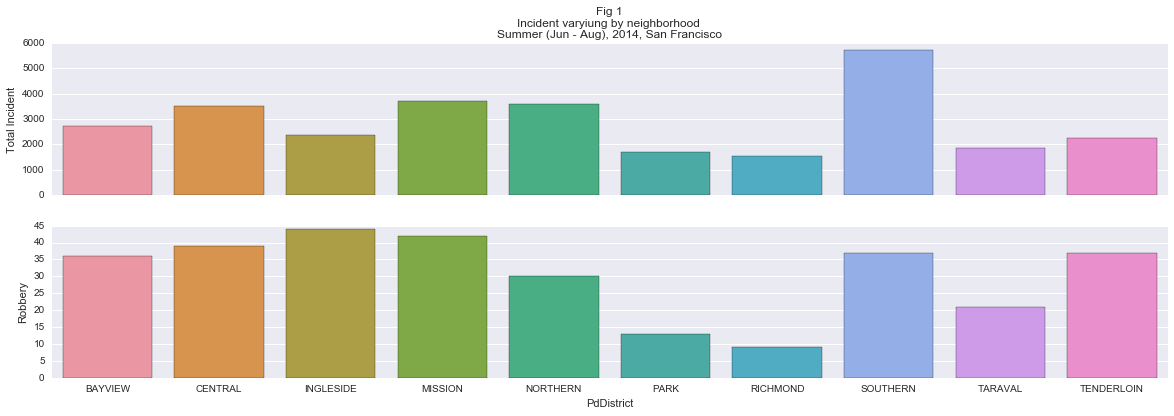

In [12]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 6),sharex = True)
robbery_area_sersis = sanf[sanf['Category'] == 'ROBBERY'].groupby('PdDistrict').count()['IncidntNum']
area_sersis = sanf.groupby('PdDistrict').count()['IncidntNum']
sns.barplot(list(area_sersis.index), area_sersis, ax=ax1)
sns.barplot(robbery_area_sersis.index, robbery_area_sersis, ax=ax2)
ax1.set_ylabel('Total Incident')
ax2.set_ylabel('Robbery')
ax1.set_title('Fig 1\nIncident varyiung by neighborhood \nSummer (Jun - Aug), 2014, San Francisco')

The picture above consists of 2 parts, the upper one is the total incidents varyiung by neighborhood, while the lower one shows robbery count varyiung by neighborhood.

We can find that Southern is distinct where has the most incidents, however for robbery, Ingleside is the most dangerous area. Besides, from the picture, it's easy to find the total incident number and robbery number are relative, saying the area has more robbery, usually has more incidents.

# 2. My main story: when should police be careful for robbery in San Francisco? (during summer)

### From the previous visualisation, we found Ingleside, Mission and Southern are the areas most prone to robbery, where Southern is also prone to all other crime, so Southern is definely a dangerous area in SF.

### Now we move to the time of robbery. My data works on Summer (Jun - Aug), 2014 in SF, if I have more data, the results can be more convincing, while the methodology can be very similar. Let's look at incidents vary by weekday first.


##  2.1 How do incidents vary by weekday?

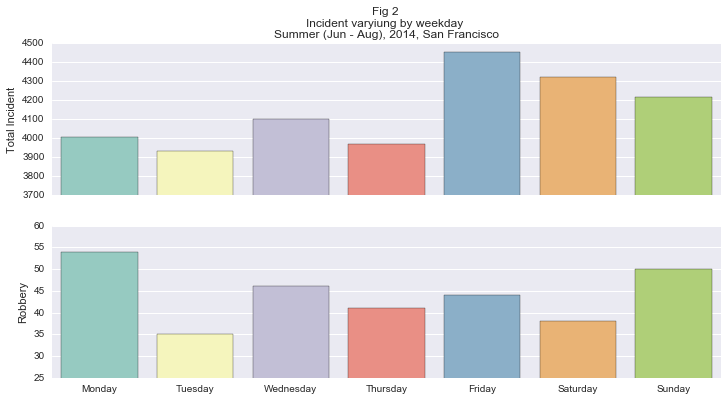

In [13]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 6),sharex = True)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_count = [sanf.groupby('DayOfWeek').count()['IncidntNum'][weekday] for weekday in weekdays]
robbery_week_count = [sanf[sanf['Category'] == 'ROBBERY'].groupby('DayOfWeek').count()['IncidntNum'][weekday] for weekday in weekdays]
sns.barplot(weekdays, week_count, palette = 'Set3', ax=ax1)
sns.barplot(weekdays, robbery_week_count, palette = 'Set3', ax=ax2)
ax1.set_ylabel('Total Incident')
ax2.set_ylabel('Robbery')
ax1.set_ylim([3700, 4500])
ax2.set_ylim([25, 60])
ax1.set_title('Fig 2 \nIncident varyiung by weekday \nSummer (Jun - Aug), 2014, San Francisco')

The picture above consists of 2 parts, the upper one is the total incidents varyiung by weekday, while the lower one shows robbery count varyiung by weekday.

We can find that Friday maybe the most dangerous day during a week, and the weekend has higher crime rate.

While for robbery, Monday becomes the most dangerous one, indeed, weekday seems not so important for robbers. 

### Then, let's look at incidents vary during a day.

##  2.2 How do incidents vary during a day?

First of all, add a new column for 'Hour'.

In [5]:
sanf['Hour'] = sanf['Time'].map(lambda x: x[:2])

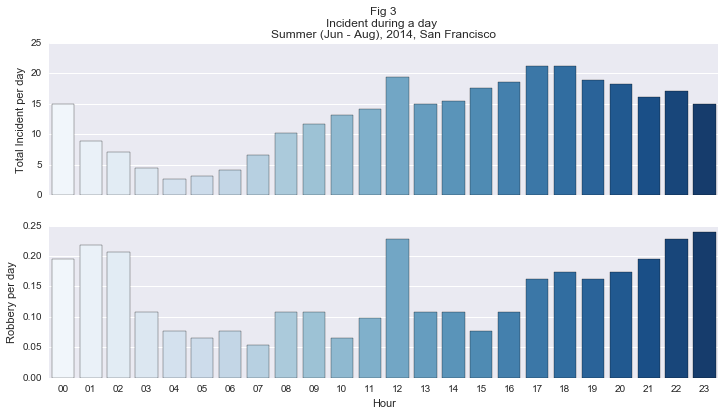

In [14]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 6),sharex = True)
hoursersis = sanf.groupby('Hour').count()['IncidntNum']
robbery_hoursersis = sanf[sanf['Category'] == 'ROBBERY'].groupby('Hour').count()['IncidntNum']
sns.barplot(list(hoursersis.index), hoursersis / 92., palette = 'Blues', ax = ax1)
sns.barplot(robbery_hoursersis.index, robbery_hoursersis / 92., palette = 'Blues', ax = ax2)
ax1.set_ylabel('Total Incident per day')
ax2.set_ylabel('Robbery per day')
ax1.set_title('Fig 3\nIncident during a day \nSummer (Jun - Aug), 2014, San Francisco')

The picture above consists of 2 parts, the upper one is the total incidents varyiung by hour during a day, while the lower one shows robbery count.

The result is intuitive, especially for robbery. Everyone thinks dark creates more crime, it's true. However, the moon seems very dangerous, my explanation is at that time most people go outside for lunch, giving the chance for criminals.

### Besides, let's look at how evening reflect the incident, and robbery.

We should first define the period, I define 04:00 - 11:59 as the morning, 12:00 - 19:59 as the afternoon, and 20:00 - 03:59 as evening.

In [7]:
in_days = ['Morning (04:00 - 11:59)', 'Afternoon (12:00 - 19:59)', 'Evening (20:00 - 03:59)']
sanf['Period'] = sanf['Hour'].map(lambda x: in_days[(int(x)-4)/8])

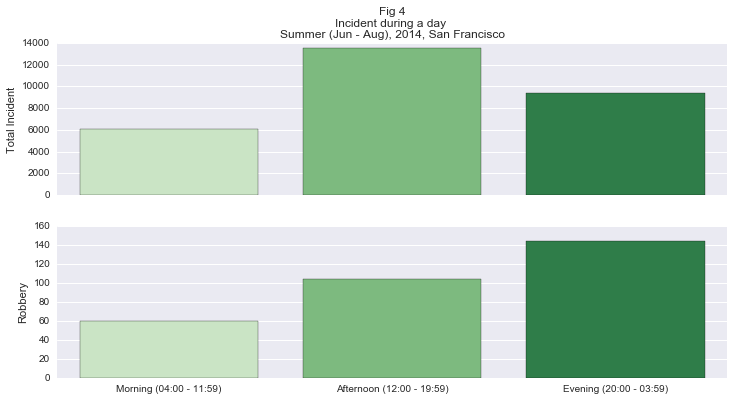

In [15]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(12, 6),sharex = True)
day_count = [sanf.groupby('Period').count()['IncidntNum'][in_day] for in_day in in_days]
robbery_day_count = [sanf[sanf['Category'] == 'ROBBERY'].groupby('Period').count()['IncidntNum'][in_day] for in_day in in_days]
sns.barplot(in_days, day_count, palette = 'Greens', ax = ax1)
sns.barplot(in_days, robbery_day_count, palette = 'Greens', ax = ax2)
ax1.set_ylabel('Total Incident')
ax2.set_ylabel('Robbery')
ax1.set_title('Fig 4\nIncident during a day \nSummer (Jun - Aug), 2014, San Francisco')

We find that, evening really give the chance to robbers, but for most criminal, they prefer the afternoon.

##  2.3 Conlusion: when should police be careful for robbery in San Francisco? 

### From Fig 2, we can easily find, for robbery, Monday seems the most dangerous, which may not be very significant. While for all other crime, weekend (including Friday) seems more dangerous.
### During a day, it's very intuitive that when it's late in a day, there will usually be more crime, which is true in my visualisation. (Fig 3)
### Fig 3 is quitely interesting. We find, the moon (12:00 - 13:00) is really a dangerous period, which has a soaring crime. My explanation is, that this period is usually the time for working people and students to go out for lunch, which will give criminal more "chance".
### Besides, for robbery, 17:00 - 03:00 is more frequent, while for all other crime, it's from afternoon to evening (12:00 - 1:00). For most criminals, they seems to sleep earlier than robbers :) , which inspires me to visualize the period graph with morning, afternoon and evening.
### Then, in Fig 4, it proves my guess from Fig 3: most criminal prefer afternoon, while robbers prefer evening. 
### Why most crime happen in the afternoon?  Because many crime happen during the working hour, don't they :) ?